# Importing Libraries and Dataset

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing Dataset

dataset = pd.read_excel("HousePricePrediction.xlsx")

### Loading the dataset

In [4]:
print("Dataset loaded successfully.")

print(dataset.head())

Dataset loaded successfully.
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [5]:
print(dataset.tail())

        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
2914       1970          1970     CemntBd         0.0        546.0        NaN  
2915       1970          1970     CemntBd         0.0        546.0        NaN  
2916       1960          1996     VinylSd         0.0       1224.0        NaN  
2917       1992          1992     HdBoard         0.0        912.0        NaN  
2918       1993          1994     HdBoard         0.0        996.0        NaN  


In [6]:
#Determining the dimensions of the dataset

dataset.shape

(2919, 13)

## Data Preprocessing

In [7]:
#Data Preprocessing

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


### Data Analysis

Visualizing correlations...


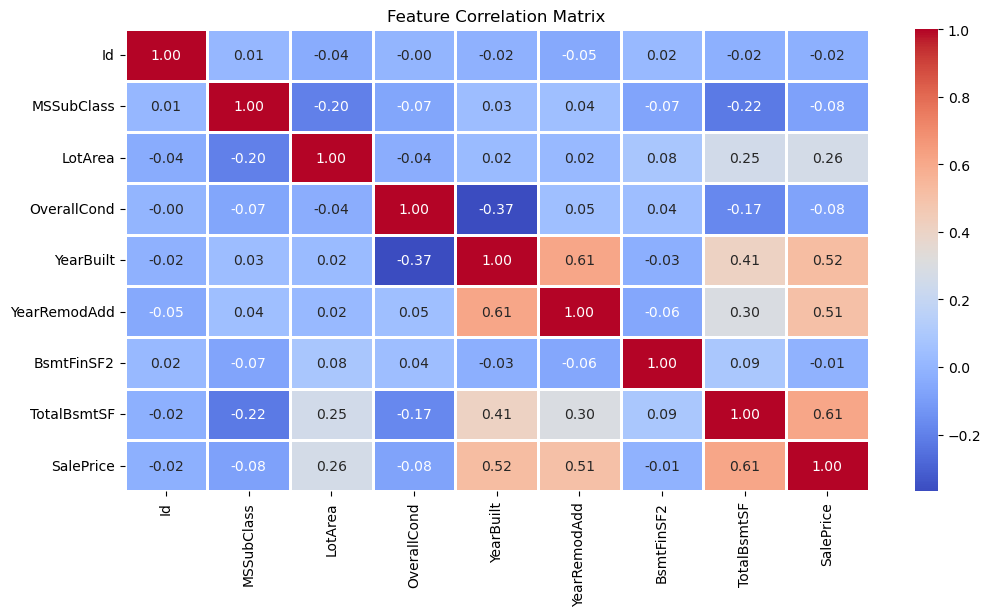

In [8]:
#Exploratory Data Analysis

print("Visualizing correlations...")

numerical_data = dataset.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_data.corr(), cmap='coolwarm', fmt='.2f', linewidths=2, annot=True)

plt.title('Feature Correlation Matrix')
plt.show()

### Analysing different categorical features

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

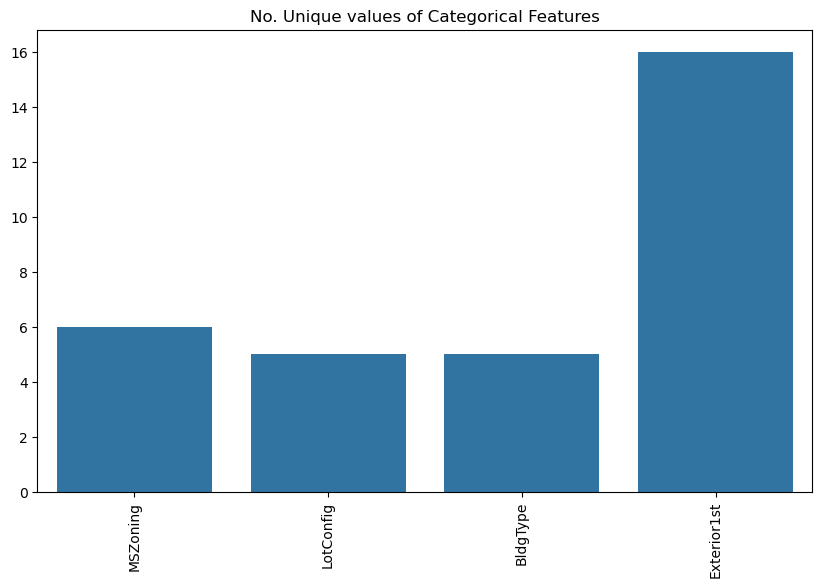

In [9]:
#Analysing differentcategorical features

unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

### Categorical Features

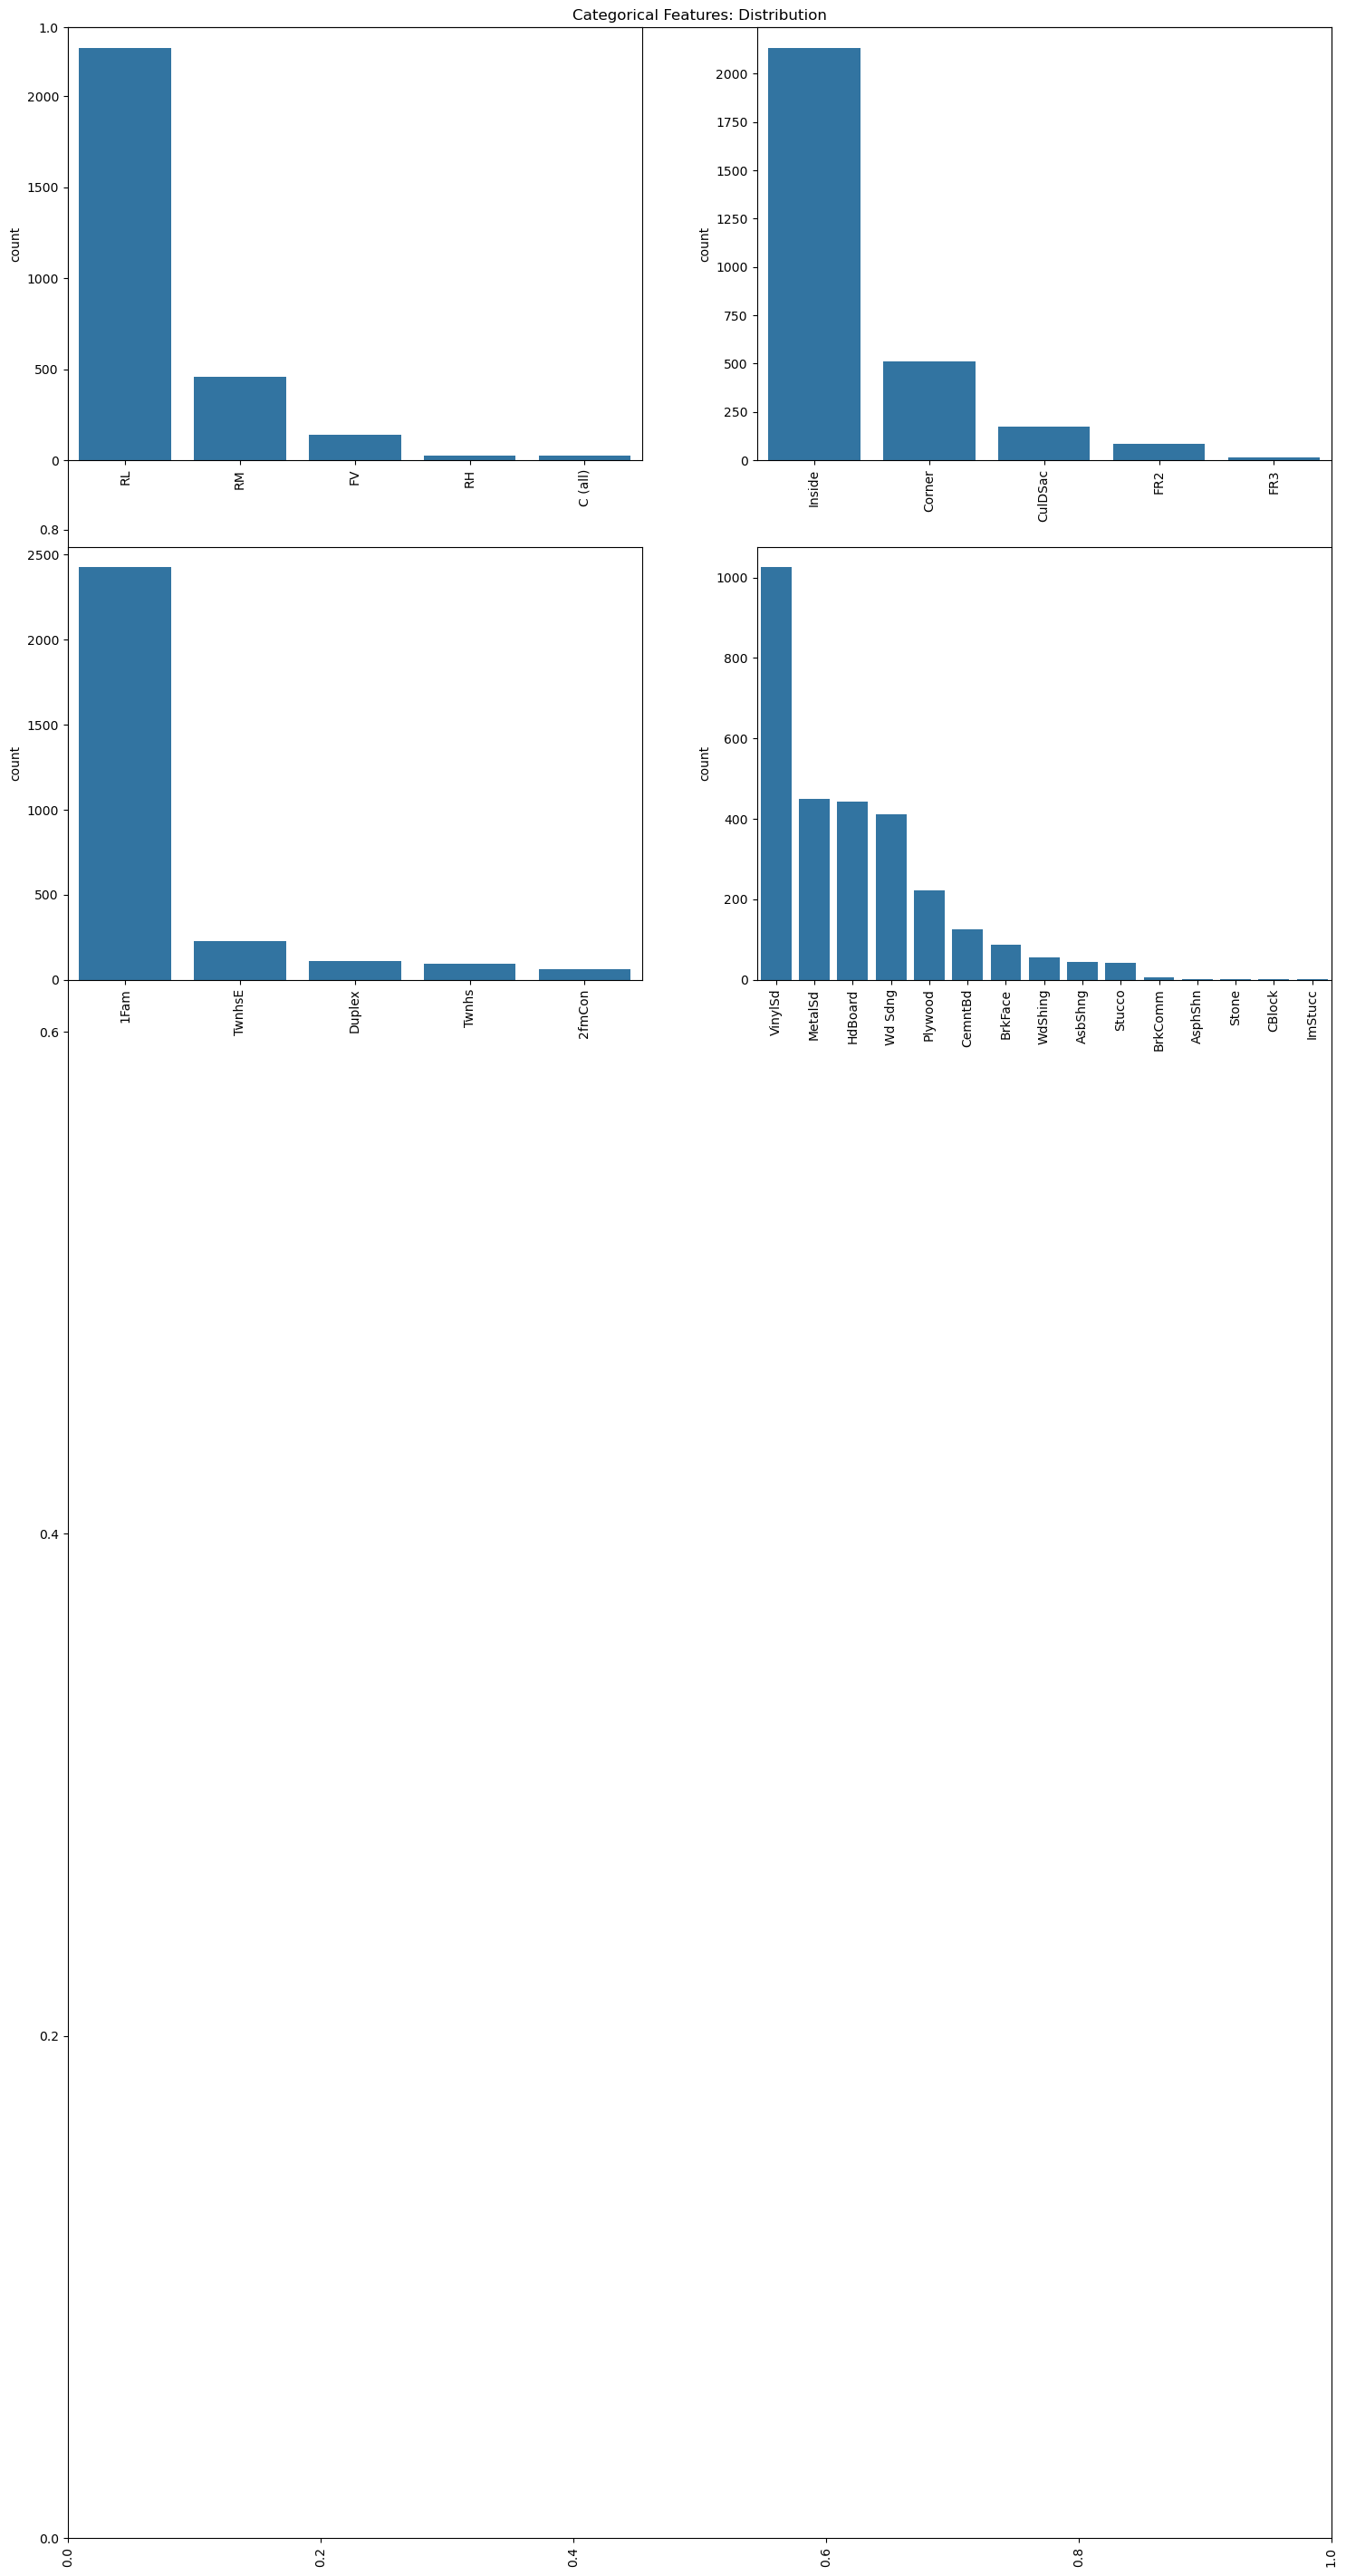

In [10]:


plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(5, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

## Data Cleaning

In [11]:
#Data Cleaning

dataset.drop(['Id'], axis=1)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


### Fill the missing data

In [12]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [13]:
new_dataset = dataset.dropna()

In [14]:
new_dataset.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## OneHotEncoder – For Label categorical features

In [15]:
#OneHotEncoder for Labeling categorical features

from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [16]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index

OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

### Splitting Dataset into Training and Testing

In [77]:
#Splitting Dataset into Training and Testing

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.72, test_size=0.28, random_state=0)

## Model and Accuracy

### SVM – Support vector Machine

In [78]:
# Model and Accuracy
# SVM

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print('MAE:', mean_absolute_percentage_error(Y_valid, Y_pred))
print('MSE:', mean_squared_error(Y_valid, Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_valid, Y_pred)))
print('R2:', r2_score(Y_valid, Y_pred))

MAE: 0.18302660921698086
MSE: 2626005447.220378
RMSE: 51244.565050553196
R2: -0.0006247685916920265


### Linear Regression

In [79]:
# LinearRegression

from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print('MAE:', mean_absolute_percentage_error(Y_valid, Y_pred))
print('MSE:', mean_squared_error(Y_valid, Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_valid, Y_pred)))
print('R2:', r2_score(Y_valid, Y_pred))

MAE: 0.18620508369293276
MSE: 1715628614.034491
RMSE: 41420.14744100377
R2: 0.3462692597516611


### Random Forest Regressor

In [80]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

print('MAE:', mean_absolute_percentage_error(Y_valid, Y_pred))
print('MSE:', mean_squared_error(Y_valid, Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_valid, Y_pred)))
print('R2:',r2_score(Y_valid, Y_pred))

MAE: 0.0750021113283292
MSE: 682819422.820253
RMSE: 26130.813665484147
R2: 0.7398154570956268


## Conclusion

Based on the evaluation metrics of Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the coefficient of determination (R²), the Random Forest Regressor model has demonstrated superior performance compared to both the Linear Regression and Support Vector Machine (SVM) models. Specifically, the Random Forest Regressor achieved lower MSE and RMSE values, indicating higher accuracy and better predictive capabilities. Additionally, the R² value for the Random Forest Regressor was higher, reflecting a better fit to the data. These results underscore the effectiveness of the Random Forest Regressor in predicting housing prices in this project.